In [3]:
# import libarary
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x shape:  (10,)
y shape:  (10,)


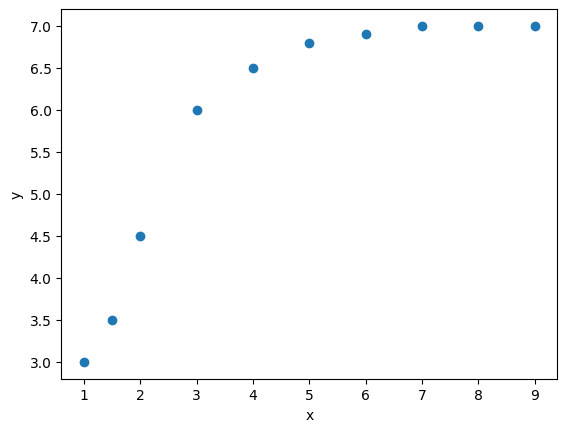

In [54]:
# create dataset for training ploynomial regression model
x = np.array([1,1.5,2,3,4,5,6,7,8,9])
y = np.array([3,3.5,4.5,6,6.5,6.8,6.9,7,7,7])

print("x shape: ", x.shape)
print("y shape: ", y.shape)

# ploting dataset
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [55]:
# convert the fetuers victor to column vector
x = x.reshape(-1,1)
print("x shape: ", x.shape)
x

x shape:  (10, 1)


array([[1. ],
       [1.5],
       [2. ],
       [3. ],
       [4. ],
       [5. ],
       [6. ],
       [7. ],
       [8. ],
       [9. ]])

In [84]:
# using linear regression model
class LinearRegression:
    def __init__(self, l_rate=0.001, iterations=10000):
        self.l_rate = l_rate
        self.iterations = iterations

    def scale(self, x):
        x_scaled = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
        return x_scaled

    def fit(self, x, y):
        self.cost = []
        self.theta = np.zeros((1 + x.shape[1]))
        n = x.shape[0]
        x = self.scale(x)

        for i in range(self.iterations):
            y_pred = self.theta[0] + np.dot(x, self.theta[1:])
            mse = 1 / n * np.sum((y_pred - y) ** 2)
            self.cost.append(mse)

            # derivative of cost function
            d_theta1 = 2 / n * np.dot(x.T, (y_pred - y))
            d_theta0 = 2 / n * np.sum(y_pred - y)

            # update thetas
            self.theta[1:] -= self.l_rate * d_theta1
            self.theta[0] -= self.l_rate * d_theta0

        return self

    def predict(self, x):
        x = self.scale(x)
        y_pred = self.theta[0] + np.dot(x, self.theta[1:])
        return y_pred

In [86]:
# fiting data point using linear regression model
lr = LinearRegression()
lr.fit(x,y)

In [87]:
lr.theta

array([5.81999999, 1.27652313])

In [88]:
# predict the traning exaple through linear regression model
y_pred = lr.predict(x)

In [89]:
# compute the mean square error
mse = (1/x.shape[0]) * np.sum((y_pred - y)**2)
rmse = np.sqrt(mse) # root mean square error

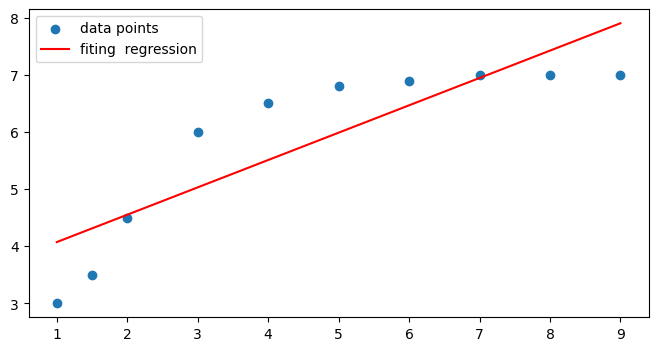

rmse:  0.7470533455929121


In [90]:
# ploting the linear regression model
plt.figure(figsize=(8,4))
plt.scatter(x,y,label='data points')
plt.plot(x,y_pred, color='red', label='fiting  regression')
plt.legend(loc="upper left")
plt.show()
print("rmse: ", rmse)

In [91]:
class PolyLinearRegression:
    def __init__(self, l_rate=0.001, iterations=10000, degree=2):
        self.l_rate = l_rate
        self.iterations = iterations
        self.degree = degree

    def scale(self, x):
        x_scaled = x - np.mean(x, axis=0)
        x_scaled = x_scaled / np.std(x_scaled, axis=0)
        return x_scaled
    
    def transformer(self, x):
        self.n = x.shape[0]
        x_transformed = np.empty((self.n, 0))  # 2D array
        for j in range(self.degree + 1):
            if j != 0:
                x_power = np.power(x, j)
                x_transformed = np.append(x_transformed, x_power, axis=1)
        return x_transformed
    
    def fit(self, x, y):
        self.cost = []
        self.theta = np.zeros((1 + self.degree))  # one dimension for bias

        x = self.scale(x)
        x_p = self.transformer(x)

        for i in range(self.iterations):
            y_pred = np.dot(x_p, self.theta[1:]) + self.theta[0]  # Corrected the calculation
            mse = 1 / self.n * np.sum((y_pred - y) ** 2)
            self.cost.append(mse)

            # derivative of cost function
            d_theta1 = 2 / self.n * np.dot(x_p.T, (y_pred - y))
            d_theta0 = 2 / self.n * np.sum(y_pred - y)

            # update thetas
            self.theta[1:] -= self.l_rate * d_theta1
            self.theta[0] -= self.l_rate * d_theta0

        return self
    
    def prediction(self, x):
        x = self.scale(x)
        x_p = self.transformer(x)

        return np.dot(x_p, self.theta[1:]) + self.theta[0]  # Corrected the calculation


In [92]:
plr = PolyLinearRegression()
plr.fit(x,y)

In [93]:
plr.transformer(x)

array([[ 1.  ,  1.  ],
       [ 1.5 ,  2.25],
       [ 2.  ,  4.  ],
       [ 3.  ,  9.  ],
       [ 4.  , 16.  ],
       [ 5.  , 25.  ],
       [ 6.  , 36.  ],
       [ 7.  , 49.  ],
       [ 8.  , 64.  ],
       [ 9.  , 81.  ]])

In [94]:
plr.theta

array([ 6.66199129,  1.41944591, -0.84766709])

In [95]:
y_pred_poly = plr.prediction(x)

In [96]:
mse = (1/x.shape[0]) * np.sum((y_pred_poly - y)**2)
rmse = np.sqrt(mse) # root mean square error

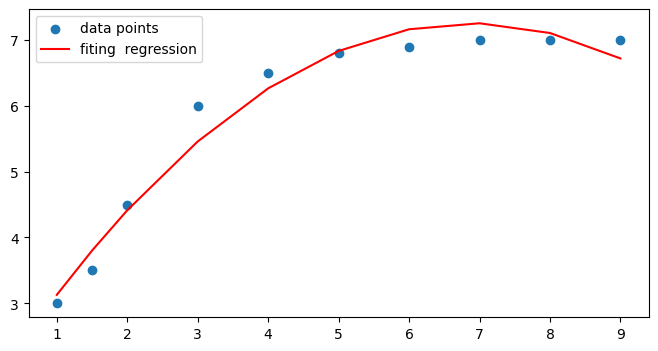

rmse:  0.26220198490642377


In [97]:
# ploting the result
plt.figure(figsize=(8,4))
plt.scatter(x,y,label='data points')
plt.plot(x,y_pred_poly, color='red', label='fiting  regression')
plt.legend(loc="upper left")
plt.show()

print("rmse: ", rmse)
